In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:
bank_data = pd.read_csv("bank-full.csv", sep = ';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank_data.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(bank_data,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# To see all columns
pd.set_option("display.max.columns", None)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [11]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

## Model Building

In [13]:
# Dividing our data into input and output variables
x = pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)  #all independent features
y = data1.iloc[:,10]    #target variable

In [14]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

/Users/tech/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
classifier.coef_

array([[-1.84823410e-02, -2.05158860e-02,  2.04570424e-05,
        -7.49677416e-01, -2.16134156e-01, -9.02703357e-03,
         3.80166695e-03, -4.07696067e-01,  2.59014456e-03,
        -1.42060891e-01, -3.02021939e-02, -2.83897249e-01,
        -3.02349186e-02, -9.79119691e-03,  7.19146109e-03,
         1.86018426e-01, -1.79678879e-02, -9.95537950e-02,
         3.38203144e-02, -7.82112538e-02,  3.26700381e-03,
         2.75952671e-03,  1.80736125e-02, -1.94411020e-01,
        -1.40464356e-01, -7.82139432e-02, -3.05072083e-01,
         5.12397179e-02,  1.52445448e-02,  1.02653391e-01,
         5.68467515e-02, -4.76301906e-01, -1.51776967e-01,
        -3.59570433e-02,  3.48961530e-01, -4.78029283e-01,
         4.59794874e-02,  2.69966192e-02,  3.22422633e-02,
        -1.61256211e-02, -1.52380403e-02, -9.19722925e-02,
        -6.12019435e-02,  9.72724169e-02, -4.64821585e-01,
        -6.42159134e-02,  1.10655019e-01,  8.36278273e-02]])

In [16]:
classifier.intercept_

array([-0.31683146])

### Model Prediction

In [17]:
# Predict for x dataset
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [18]:
classifier.predict_proba(x)

array([[0.95742435, 0.04257565],
       [0.97595311, 0.02404689],
       [0.98215253, 0.01784747],
       ...,
       [0.33487248, 0.66512752],
       [0.92280089, 0.07719911],
       [0.89466564, 0.10533436]])

In [19]:
classifier.predict_proba(x)[:,1]

array([0.04257565, 0.02404689, 0.01784747, ..., 0.66512752, 0.07719911,
       0.10533436])

In [20]:
y_pred_df = pd.DataFrame({'Actual': y,
                         'Prob': classifier.predict_proba(x)[:,1],
                         'Predicted': classifier.predict(x)})

In [21]:
y_pred_df

,Actual,Prob,Predicted
0,0,0.042576,0
1,0,0.024047,0
2,0,0.017847,0
3,0,0.019991,0
4,0,0.102382,0
...,...,...,...
45206,1,0.606247,1
45207,1,0.241348,0
45208,1,0.665128,1
45209,0,0.077199,0


In [22]:
y_pred_df['Correct'] = y_pred_df['Actual'] == y_pred_df['Predicted']
y_pred_df

,Actual,Prob,Predicted,Correct
0,0,0.042576,0,True
1,0,0.024047,0,True
2,0,0.017847,0,True
3,0,0.019991,0,True
4,0,0.102382,0,True
...,...,...,...,...
45206,1,0.606247,1,True
45207,1,0.241348,0,False
45208,1,0.665128,1,True
45209,0,0.077199,0,True


In [23]:
y_pred_df[y_pred_df['Correct']==True]

,Actual,Prob,Predicted,Correct
0,0,0.042576,0,True
1,0,0.024047,0,True
2,0,0.017847,0,True
3,0,0.019991,0,True
4,0,0.102382,0,True
...,...,...,...,...
45200,1,0.796224,1,True
45206,1,0.606247,1,True
45208,1,0.665128,1,True
45209,0,0.077199,0,True


In [24]:
y_pred_df[y_pred_df['Correct']==False]

,Actual,Prob,Predicted,Correct
37,0,0.929880,1,False
43,0,0.806950,1,False
59,0,0.930834,1,False
83,1,0.365410,0,False
129,1,0.090724,0,False
...,...,...,...,...
45202,1,0.173455,0,False
45203,1,0.312789,0,False
45204,1,0.076698,0,False
45205,1,0.189689,0,False


In [25]:
y_pred_df['Correct'].value_counts()

True     40316
False     4895
Name: Correct, dtype: int64

In [26]:
y_pred_df['Correct'].mean()

0.8917298887438898

### Confusion Matrix

In [27]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)

print (confusion_matrix)

[[39156   766]
 [ 4129  1160]]


<AxesSubplot:>

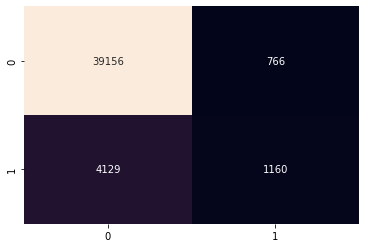

In [28]:
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cbar = False)

In [29]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39156+1162)/(39156+766+4127+1162)

0.8917741257658535

In [30]:
#Sensitivity/ Recall/ True Positive Rate
39156/(39156+766)*100

98.08125845398527

In [31]:
#Specificity/ True Negative Rate
1160/(1160+4129)*100

21.93231234637928

In [32]:
#Precision
39156/(39156+4129)*100

90.46089869469793

In [33]:
#F1 Score
(2*0.9046*0.9808)/(0.9046+0.9808)*100

94.1160156995863

In [34]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



### ROC Curve

In [35]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [36]:
classifier.predict_proba(x)

array([[0.95742435, 0.04257565],
       [0.97595311, 0.02404689],
       [0.98215253, 0.01784747],
       ...,
       [0.33487248, 0.66512752],
       [0.92280089, 0.07719911],
       [0.89466564, 0.10533436]])

In [37]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

In [38]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.98146385e-01, 9.98146385e-01, 1.00000000e+00])

In [39]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [40]:
thresholds

array([1.99999981e+00, 9.99999808e-01, 9.99985391e-01, ...,
       5.59628757e-07, 5.50415145e-07, 5.32086853e-18])

In [41]:
pd.DataFrame({'False Positive Rate': fpr, 
             'True Positive Rate': tpr,
             'Thresholds': thresholds})

,False Positive Rate,True Positive Rate,Thresholds
0,0.000000,0.000000,2.000000e+00
1,0.000025,0.000000,9.999998e-01
2,0.000050,0.000000,9.999854e-01
3,0.000050,0.000189,9.999740e-01
4,0.000125,0.000189,9.999578e-01
...,...,...,...
7136,0.994539,0.999622,1.483061e-05
7137,0.994539,0.999811,1.461754e-05
7138,0.998146,0.999811,5.596288e-07
7139,0.998146,1.000000,5.504151e-07


In [42]:
auc = roc_auc_score(y, y_pred)
auc

0.6000678540018227

Text(0.5, 1.0, 'logit model (area = 0.60)')

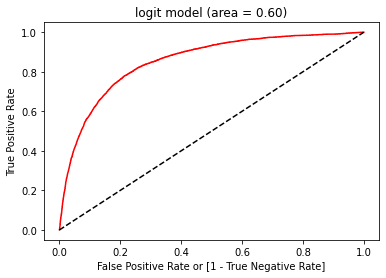

In [43]:
plt.plot(fpr, tpr, color='red')   #label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

In [44]:
np.random.rand()

0.8022955618157742

In [45]:
np.random.rand()*0.01

0.0019029472611397592

In [46]:
0.505 - np.random.rand()*0.01

0.49936950466096247

In [47]:
probas = [0.505 - np.random.rand()*0.01 for _ in y]
probas

[0.4998960139820276,
 0.5045437742939065,
 0.503552465480218,
 0.50411054531197,
 0.49674345124864383,
 0.5006293534432005,
 0.5009308809652389,
 0.49815973860717483,
 0.5021783237491586,
 0.49999545341553714,
 0.5016918466237426,
 0.5010310814221465,
 0.5030039466081548,
 0.49668243678340346,
 0.4954666672198119,
 0.49653896553727217,
 0.49650105616554296,
 0.5014576144945971,
 0.4962792205797804,
 0.5007615985253456,
 0.5011503623322854,
 0.4974421682390676,
 0.5040143532794209,
 0.5023180214586859,
 0.5031898429150629,
 0.5022525224140058,
 0.4964667632043625,
 0.5034897098230244,
 0.5011312229027662,
 0.5009268920535902,
 0.5014502925586557,
 0.503563305957507,
 0.5008524801678347,
 0.49643626014323394,
 0.5005683083214404,
 0.49516300313363004,
 0.5033631306241929,
 0.49980836963760245,
 0.5046369293115758,
 0.4986984107253693,
 0.5020124188064164,
 0.500353940296998,
 0.5019219490042185,
 0.5028013116262601,
 0.5021705735124888,
 0.5037969117111755,
 0.503282393814502,
 0.4955717

In [48]:
probas = [0.51 - np.random.rand()*0.01 if _y else 0.49 + np.random.rand()*0.01 for _y in y]
probas

[0.4954901135303111,
 0.4971827074704455,
 0.4932458798037646,
 0.49159195037336545,
 0.49338157414529316,
 0.49184598672585433,
 0.4951032376206085,
 0.49743303766551084,
 0.49886627391584154,
 0.49770634594969526,
 0.4958826229708076,
 0.4904252131413236,
 0.49999268090314564,
 0.4971454722194623,
 0.4928262357459253,
 0.49384335470435337,
 0.49372040492374314,
 0.4975450439245768,
 0.4926724189418846,
 0.4951868972170223,
 0.4948694818949915,
 0.49276752053257217,
 0.49957047013783396,
 0.4993885104626302,
 0.49491741245809856,
 0.49928942590890873,
 0.4939032294902122,
 0.49798756517653425,
 0.4932133564030714,
 0.4974883411537539,
 0.49732320168682687,
 0.497121109308685,
 0.4994154398122282,
 0.4907982031902749,
 0.49791717776701,
 0.49394237036214894,
 0.49171186199638844,
 0.4971798416443294,
 0.49914854365301436,
 0.49586590065615693,
 0.49369694635010397,
 0.49791488178061666,
 0.4987740899399086,
 0.49663360159091746,
 0.4985981466917119,
 0.49045345159416465,
 0.49089882692

In [49]:
acc = np.array([(_y > 0.5) == _y for _y in y])
acc

array([ True,  True,  True, ...,  True,  True,  True])

In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [51]:
acc.mean()

1.0

In [52]:
fpr, tpr, thresholds = roc_curve(y, probas)
fpr, tpr, thresholds

(array([0., 0., 0., 1.]),
 array([0.00000000e+00, 1.89071658e-04, 1.00000000e+00, 1.00000000e+00]),
 array([1.50999803, 0.50999803, 0.50000023, 0.4900002 ]))

In [53]:
fpr

array([0., 0., 0., 1.])

In [54]:
tpr

array([0.00000000e+00, 1.89071658e-04, 1.00000000e+00, 1.00000000e+00])

In [55]:
thresholds

array([1.50999803, 0.50999803, 0.50000023, 0.4900002 ])

In [56]:
pd.DataFrame({'False Positive Rate': fpr, 
             'True Positive Rate': tpr,
             'Thresholds': thresholds})

,False Positive Rate,True Positive Rate,Thresholds
0,0.0,0.000000,1.509998
1,0.0,0.000189,0.509998
2,0.0,1.000000,0.500000
3,1.0,1.000000,0.490000


In [57]:
auc = roc_auc_score(y, probas)
auc

1.0

Text(0.5, 1.0, 'logit model (area = 1.00)')

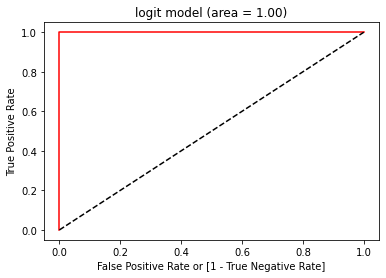

In [58]:
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('logit model (area = %0.2f)'%auc)

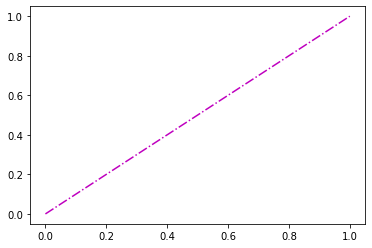

In [59]:
plt.plot([0, 1], [0, 1], 'm-.')